In [1]:
import pandas as pd
import sqlite3

In [2]:
timestamps = pd.read_sql("select distinct record_time from EBAY_TOP_BERLIN order by record_time desc limit 2", sqlite3.connect("UsedObjects.db"))

In [3]:
timestamps

,RECORD_TIME
0,2021-08-23 17:00
1,2021-08-23 16:30


In [4]:
df = pd.read_sql("select * from EBAY_TOP_BERLIN where record_time in (select distinct record_time from EBAY_TOP_BERLIN order by record_time desc limit 2)", sqlite3.connect("UsedObjects.db"))

In [5]:
df_pivot = df.pivot_table(index="PRODUCT", columns = "RECORD_TIME", values = "LISTING_COUNT")

In [6]:
df_pivot.columns = ["stamp_1", "stamp_2"]
df_pivot_diff = df_pivot.diff(axis=1)

<AxesSubplot:ylabel='PRODUCT'>

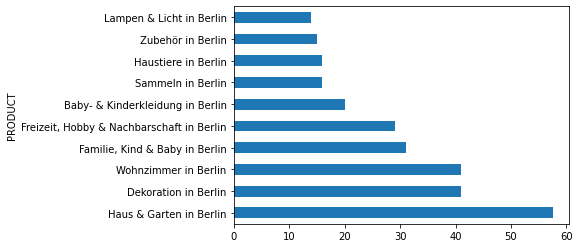

In [7]:
df_pivot_diff.sort_values("stamp_2", ascending = False)["stamp_2"].head(10).plot.barh()